In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy import stats
import time

# EDA

In [ ]:
df=pd.read_csv('reguler_nonkapitasi.csv')
df.head()

,Unnamed: 0,PSTV01,PSTV02,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK06,PNK07,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,0,58535615,39540462,0.949749,140270421P000283,2021-04-18,2021-04-20,2021-04-20,JAWA TIMUR,KAB. LAMONGAN,...,KLINIK RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A01,Typhoid and paratyphoid fevers,Rawat Inap di R. Perawatan Biasa,360000,360000
1,1,72754862,72754862,6.303136,88220121P001458,2021-01-26,2021-01-29,2021-01-29,JAWA TIMUR,KAB. BANGKALAN,...,RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,540000,540000
2,2,390220748,401640722,24.871052,433810421P000084,2021-04-30,2021-05-02,2021-05-02,JAWA TIMUR,KAB. TRENGGALEK,...,KLINIK RAWAT INAP,RITP,PBPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,360000,360000
3,3,61351881,64119870,18.174042,199281021P000077,2021-10-02,2021-10-04,2021-10-04,LAMPUNG,KAB. TANGGAMUS,...,KLINIK RAWAT INAP,RITP,PBI APBD,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,400000,400000
4,4,20965023,20965023,45.487633,420800621P000260,2021-06-09,2021-06-13,2021-06-13,ACEH,KAB. ACEH UTARA,...,KLINIK RAWAT INAP,RITP,BUKAN PEKERJA,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,660000,660000


In [ ]:
df['PNK13'].unique()

array(['A01 Typhoid and paratyphoid fevers',
       'A02 Other salmonella infections',
       'A04 Other bacterial intestinal infections',
       'A05 Other bacterial foodborne intoxications, not elsewhere classified',
       'A06 Amoebiasis', 'A07 Other protozoal intestinal diseases',
       'A09 Other gastroenteritis and colitis of infectious and unspecified origin',
       'A15 Respiratory tuberculosis, bacteriologically and histologically confirmed',
       'A16 Respiratory tuberculosis, not confirmed bacteriologically or histologically',
       'A17 Tuberculosis of nervous system',
       'A18 Tuberculosis of other organs', 'A22 Anthrax',
       'A30 Leprosy [Hansen disease]', 'A35 Other tetanus',
       'A38 Scarlet fever', 'A40 Streptococcal sepsis',
       'A41 Other sepsis', 'A49 Bacterial infection of unspecified site',
       'A68 Relapsing fevers', 'A75 Typhus fever', 'A78 Q fever',
       'A88 Other viral infections of central nervous system, not elsewhere classified',
   

In [ ]:
df['PNK14'].unique()

array(['A01', 'A010', 'A014', 'A020', 'A049', 'A04', 'A042', 'A059',
       'A060', 'A069', 'A07', 'A09', 'A099', 'A090', 'A159', 'A15',
       'A150', 'A152', 'A156', 'A160', 'A16', 'A170', 'A179', 'A182',
       'A222', 'A30', 'A35', 'A38', 'A40', 'A419', 'A418', 'A499', 'A49',
       'A68', 'A759', 'A75', 'A78', 'A881', 'A90', 'A91', 'A920', 'A929',
       'A94', 'A959', 'A969', 'A99', 'B052', 'B15', 'B16', 'B169', 'B161',
       'B199', 'B19', 'B209', 'B20', 'B24', 'B342', 'B34', 'B349', 'B39',
       'B50', 'B509', 'B51', 'B54', 'C029', 'C169', 'C18', 'C189', 'C220',
       'C34', 'C490', 'C50', 'C53', 'C539', 'C56', 'C719', 'C715', 'C762',
       'D213', 'D210', 'D215', 'D214', 'D24', 'D259', 'D26', 'D27', 'D45',
       'D464', 'D50', 'D500', 'D509', 'D53', 'D551', 'D553', 'D550',
       'D55', 'D59', 'D63', 'D638', 'D64', 'D649', 'D648', 'D696', 'D693',
       'D728', 'D72', 'E04', 'E05', 'E059', 'E079', 'E109', 'E108', 'E10',
       'E104', 'E107', 'E102', 'E106', 'E119', 'E11'

In [ ]:
df.describe()

,Unnamed: 0,PSTV01,PSTV02,PSTV15,PNK17,PNK18
count,95617.000000,9.561700e+04,9.561700e+04,95617.000000,9.561700e+04,9.561700e+04
mean,47808.000000,9.997859e+07,1.058877e+08,72.068500,1.301120e+05,1.301120e+05
std,27602.394682,1.065886e+08,1.046051e+08,137.702529,2.165907e+05,2.165907e+05
min,0.000000,2.339500e+04,2.283500e+04,0.504971,1.000000e+04,1.000000e+04
25%,23904.000000,3.332184e+07,3.615472e+07,12.081010,3.000000e+04,3.000000e+04
50%,47808.000000,6.704268e+07,7.450574e+07,36.032930,4.500000e+04,4.500000e+04
75%,71712.000000,1.005230e+08,1.151735e+08,84.882230,1.200000e+05,1.200000e+05
max,95616.000000,4.599362e+08,4.599362e+08,11384.331000,8.663400e+06,8.663400e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95617 entries, 0 to 95616
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  95617 non-null  int64  
 1   PSTV01      95617 non-null  int64  
 2   PSTV02      95617 non-null  int64  
 3   PSTV15      95617 non-null  float64
 4   PNK02       95617 non-null  object 
 5   PNK03       95617 non-null  object 
 6   PNK04       95617 non-null  object 
 7   PNK05       95617 non-null  object 
 8   PNK06       95617 non-null  object 
 9   PNK07       95617 non-null  object 
 10  PNK08       95617 non-null  object 
 11  PNK09       95617 non-null  object 
 12  PNK10       95617 non-null  object 
 13  PNK11       95617 non-null  object 
 14  PNK12       95617 non-null  object 
 15  PNK13       95617 non-null  object 
 16  PNK13A      95617 non-null  object 
 17  PNK14       95617 non-null  object 
 18  PNK15       95617 non-null  object 
 19  PNK16       95617 non-nul

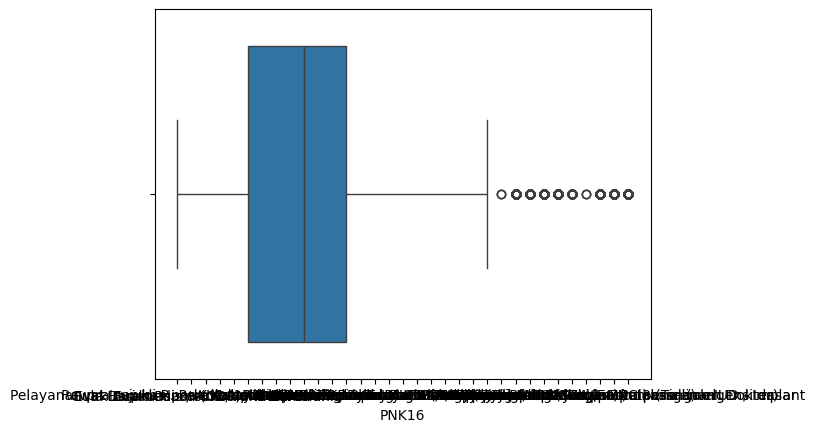

In [ ]:
sns.boxplot(x=df['PNK16'])
plt.show()

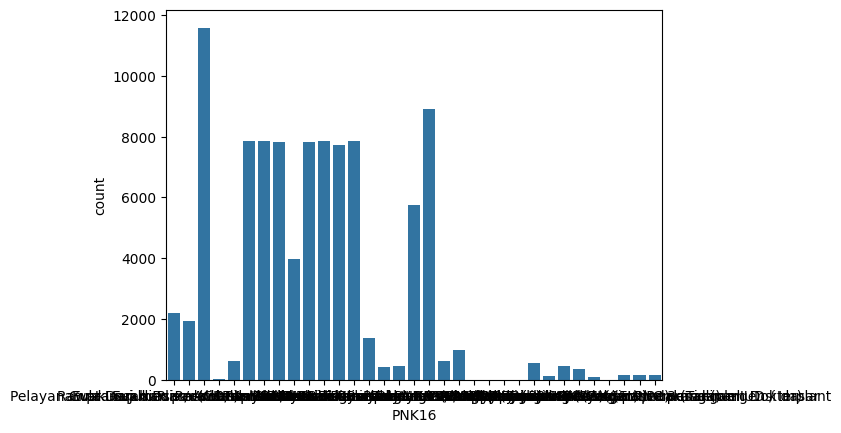

In [ ]:
sns.countplot(x='PNK16', data=df)
plt.show()

#Data Processing

In [ ]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

In [ ]:
chi2_results = []

In [ ]:
for column in df.columns:
    if column != 'PNK16':
        contingency_table = pd.crosstab(df[column], df['PNK16'])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi2_results.append((column, chi2, p))


In [ ]:
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi-Square', 'P-Value'])

In [ ]:
chi2_df_sorted = chi2_df.sort_values(by='P-Value')
print(chi2_df_sorted)

       Feature    Chi-Square   P-Value
10       PNK08  4.369559e+04  0.000000
18       PNK15  7.352256e+05  0.000000
17       PNK14  7.352256e+05  0.000000
16      PNK13A  6.367646e+05  0.000000
15       PNK13  6.367646e+05  0.000000
14       PNK12  1.344104e+04  0.000000
13       PNK11  1.912340e+05  0.000000
12       PNK10  1.815541e+05  0.000000
11       PNK09  1.666948e+05  0.000000
19       PNK17  1.423137e+06  0.000000
20       PNK18  1.423137e+06  0.000000
8        PNK06  2.474442e+04  0.000000
7        PNK05  2.156015e+04  0.000000
6        PNK04  2.187986e+04  0.000000
5        PNK03  2.220511e+04  0.000000
4        PNK02  2.324036e+06  0.000000
3       PSTV15  5.976497e+05  0.000000
2       PSTV02  1.619733e+06  0.000000
1       PSTV01  1.635973e+06  0.000000
9        PNK07  1.353449e+05  0.000000
0   Unnamed: 0  3.059744e+06  0.494732


In [ ]:
df=df[['PNK17','PSTV02','PNK13','PNK14','PSTV15','PNK16']]
df

,PNK17,PSTV02,PNK13,PNK14,PSTV15,PNK16
0,360000,39540462,0,0,0.949749,30
1,540000,72754862,0,1,6.303136,30
2,360000,401640722,0,1,24.871052,30
3,400000,64119870,0,1,18.174042,30
4,660000,20965023,0,1,45.487633,30
...,...,...,...,...,...,...
95612,15000,438996547,410,838,13.705892,23
95613,100000,190143242,410,838,50.320034,22
95614,100000,218096620,410,838,250.536970,21
95615,100000,150819601,410,838,312.740600,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95617 entries, 0 to 95616
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PNK17   95617 non-null  int64  
 1   PSTV02  95617 non-null  int64  
 2   PNK13   95617 non-null  int64  
 3   PNK14   95617 non-null  int64  
 4   PSTV15  95617 non-null  float64
 5   PNK16   95617 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.4 MB


In [ ]:
df.isnull().sum()

,0
PNK17,0
PSTV02,0
PNK13,0
PNK14,0
PSTV15,0
PNK16,0


In [ ]:
df= df[df['PNK16'] >= 20]

In [ ]:
count_pnk16 = df['PNK16'].value_counts()

In [ ]:
valid_values = count_pnk16[count_pnk16 >= 20].index
df_filtered = df[df['PNK16'].isin(valid_values)]

In [ ]:
df=df_filtered

In [ ]:
df['PNK16'].value_counts()

,count
PNK16,
32,7833
23,5754
30,2189
22,1361
28,619
24,565
25,438
21,409
26,160


# Membuat Model Machine Learning

In [ ]:
X = df.drop('PNK16', axis=1)
y = df['PNK16']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
results = []

In [ ]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    execution_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Execution Time (s)": execution_time
    })

In [ ]:
results.append({"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "Execution Time": execution_time})
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.553793183488723,
  'Precision': 0.5397981579392462,
  'Recall': 0.553793183488723,
  'F1 Score': 0.5240248057427035,
  'Execution Time (s)': 7.287081956863403},
 {'Model': 'K-Nearest Neighbors',
  'Accuracy': 0.7584045804479864,
  'Precision': 0.760615005975297,
  'Recall': 0.7584045804479864,
  'F1 Score': 0.7566141209721007,
  'Execution Time (s)': 2.253345012664795},
 {'Model': 'Random Forest',
  'Accuracy': 0.8631668536500445,
  'Precision': 0.8621383721474175,
  'Recall': 0.8631668536500445,
  'F1 Score': 0.8623352811437336,
  'Execution Time (s)': 14.22420072555542},
 {'Model': 'Random Forest',
  'Accuracy': 0.8631668536500445,
  'Precision': 0.8621383721474175,
  'Recall': 0.8631668536500445,
  'Execution Time': 14.22420072555542}]

# Uji coba data baru

In [ ]:
data_baru = pd.DataFrame({
    'PNK17': [40000, 100000, 80000, 120000, 60000],
    'PSTV02':[83003532, 871934812, 98164026, 61026483, 7102651],
    'PNK13': ['A01 Typhoid and paratyphoid fevers',
              'A38 Scarlet fever',
              'B15 Acute hepatitis A',
              'C50 Malignant neoplasm of breast',
              'D50 Iron deficiency anaemia'],
    'PNK14': ['A01', 'A38', 'B15', 'C50', 'D50'],
    'PSTV15': [235634, 748125, 12895, 98724522, 78125018]
})

In [ ]:
data_baru['PNK13'] = label_encoders['PNK13'].transform(data_baru['PNK13'])
data_baru['PNK14'] = label_encoders['PNK14'].transform(data_baru['PNK14'])

In [ ]:
data_baru_scaled = scaler.transform(data_baru)

In [ ]:
predictions = models['Random Forest'].predict(data_baru_scaled)

In [ ]:
decoded_predictions = label_encoders['PNK16'].inverse_transform(predictions)

In [ ]:
print("Hasil Prediksi untuk 5 Data Baru:")
for i, pred in enumerate(decoded_predictions):
    print(f"Data ke-{i + 1}: PNK16 -> {pred}")

Hasil Prediksi untuk 5 Data Baru:
Data ke-1: PNK16 -> Ureum
Data ke-2: PNK16 -> Pelayanan KB : Pemasangan IUD / Implant
Data ke-3: PNK16 -> Pelayanan KB : Pemasangan IUD / Implant
Data ke-4: PNK16 -> Rawat Inap di R. Perawatan Biasa
Data ke-5: PNK16 -> Ureum
